# Working with Jupyter Notebooks

A Jupyter Notebook is a web-based application that allows you to create and share documents containing live code, text, visualizations, and other rich media. A cell is the basic unit of interaction in a notebook. A cell can contain code or [markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).


You can select the type of cell from the menu above. 

<img src="../images/select_cell_type.png"/>

Then select the '+' from the menu.

If you select **Markdown**, the cell can format text and code. We can use it to add notes, images, and detailed comments in the notebook. A basic cheat sheet as a notebook is [included](Markdown-Cheat-Sheet.ipynb). 

If you select **Code** then you can write Python code and run it in the cell.

Let's look at the example code below. Programs are built from smaller programs called packages. The first thing we do is import the `datetime` package which lets you manipulate dates and time.

The following sections are `functions` is a block of code that runs when called. You can pass data or parameters to the funciton. Functions increase code reusability and readability. Functions follow the `DRY` or "Don't Repeat Yourself" principal which is guideline to avoid code duplication. Functions are defined with `def` keyword, the name of the function followed by parameters, and terminated with a colon. The following code is indented and `return` sends the result back to the code that called the function.

The program flow is:

1. Call the `date` function to get today's date.
2. Call the `format_date_with_ordinal` with today's date.
3. The `format_date_with_ordinal` calls the `ordinal_suffix` function to place the correct suffix for the day.
4. The `format_date_with_ordinal` returns the formated date.
5. The program prints a message with the formatted date.

In [22]:
# This is a code cell. Run this python example by selecting the 'play' icon in the menu

from datetime import date

def ordinal_suffix(day):
    if 10 <= day <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(day % 10, 'th')
    return suffix

def format_date_with_ordinal(date_obj):
    day = date_obj.day
    suffix = ordinal_suffix(day)
    return f"{date_obj.strftime('%B')} {day}{suffix}, {date_obj.year}"

today = date.today()
formatted_date = format_date_with_ordinal(today)
print("\n\n Hello, today is", formatted_date)
print("\n\n")



 Hello, today is March 25th, 2025





# Introduction to Python with obspy

This section demonstrates how to write Python code in a Jupyter Notebook. We'll use a `obspy`, a Python framework (or package) for processing seismic data. It provides parsers for common file formats, clients to access data centers and seismological signal processing routines which allow the manipulation of seismological time series.

We'll start by importing modules from `obspy`. For a first task, we'll view FDSN data centers that offer web services for acquiring data and create a client object that connects to a data center.

In [23]:
from obspy.clients.fdsn import Client
from obspy.clients.fdsn.header import URL_MAPPINGS

# lists the data centers and their names
for key in sorted(URL_MAPPINGS.keys()):
    print("{0:<11} {1}".format(key,  URL_MAPPINGS[key]))  

# creates a client that connects to the IRIS data center
client = Client("IRIS")

AUSPASS     http://auspass.edu.au
BGR         http://eida.bgr.de
EIDA        http://eida-federator.ethz.ch
EMSC        http://www.seismicportal.eu
ETH         http://eida.ethz.ch
GEOFON      http://geofon.gfz-potsdam.de
GEONET      http://service.geonet.org.nz
GFZ         http://geofon.gfz-potsdam.de
ICGC        http://ws.icgc.cat
IESDMC      http://batsws.earth.sinica.edu.tw
INGV        http://webservices.ingv.it
IPGP        http://ws.ipgp.fr
IRIS        http://service.iris.edu
IRISPH5     http://service.iris.edu
ISC         http://www.isc.ac.uk
KNMI        http://rdsa.knmi.nl
KOERI       http://eida.koeri.boun.edu.tr
LMU         https://erde.geophysik.uni-muenchen.de
NCEDC       https://service.ncedc.org
NIEP        http://eida-sc3.infp.ro
NOA         http://eida.gein.noa.gr
ODC         http://www.orfeus-eu.org
ORFEUS      http://www.orfeus-eu.org
RASPISHAKE  https://data.raspberryshake.org
RESIF       http://ws.resif.fr
RESIFPH5    http://ph5ws.resif.fr
SCEDC       http://service.sc

Notebooks offer flexibility when coding. Typically, it is good practice to import packages and modules at the beginning of a program. A notebook lets you import on-the-fly and maintains the previous import. In this case, we're import `UTCDateTime` from obspy because it is based on high precision timestamp that the Python `datetime` class does not offer.

In [24]:
from obspy import UTCDateTime

We can find events using a start date and end date. If we wanted to find earthquakes in 2020 with a magnitude of 7 or greater, we can use obspy's `get_events` method.

In [25]:
starttime = UTCDateTime("2020-01-01")
endtime = UTCDateTime("2025-12-31")
cat = client.get_events(starttime=starttime, endtime=endtime, minmagnitude=7)

The events are stored in a `Catalog` which is a list-like container for `streams`. We can list the number of streams in a catalog.

In [26]:
print(cat.count())

68


Catalogs handle event metadata in a hierarchy that follows the [QuakeML](https://quake.ethz.ch/quakeml/) format. The diagram shows `Event` metadata has `origins` which includes latitude, longitude, depth, and time.

![](./images/Event.png)

Let's get an individual stream from the catalog. Catalogs behave like Python lists and we can use the index to get the time of a single event. The example below, extracts the time for the first event in the catalog 

In [27]:
t = cat[0].origins[0].time
print(t)

2025-02-08T23:23:14.341000Z


We get a stream of waveforms with the `get_waveforms` method. The method takes several arguments or parameters that are [documented](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_waveforms.html).

> **Client.get_waveforms**(*network*, *station*, *location*, *channel*, *starttime*, *endtime*, *quality=None*, *minimumlength=None*, *longestonly=None*, *filename=None*, *attach_response=False*, **kwargs)

Using the time from the previous cell, we retrieve data from **IU**, the global network, and use wildcards for the station and location. We specify `LHZ` as the instrument channel and set the time for one minute before the event and fifteen minutes after.

In [49]:
st = client.get_waveforms("IU", "*", "*", "LHZ", t - 60 * 5, t + 60 * 120)
print(st)


135 Trace(s) in Stream:

IU.AFI.00.LHZ | 2025-02-08T23:18:15.069538Z - 2025-02-09T01:23:14.069538Z | 1.0 Hz, 7500 samples
...
(133 other traces)
...
IU.YSS.10.LHZ | 2025-02-08T23:18:15.069538Z - 2025-02-09T01:23:14.069538Z | 1.0 Hz, 7500 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


`get_waveforms` returns a stream which contains a list of `traces`. A trace is gap-less continuous time series and metadata. Let's examine the first trace in the stream and print the metadata using the `stats` method.

In [50]:
print(len(st))
tr = st[0]
print(tr.stats)

135
               network: IU
               station: AFI
              location: 00
               channel: LHZ
             starttime: 2025-02-08T23:18:15.069538Z
               endtime: 2025-02-09T01:23:14.069538Z
         sampling_rate: 1.0
                 delta: 1.0
                  npts: 7500
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 45, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 3270656})
            processing: ['ObsPy 1.4.1: trim(endtime=UTCDateTime(2025, 2, 9, 1, 23, 14, 69538)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2025, 2, 8, 23, 18, 14, 69538))']


`stats` lets you access invidual metadata elements.

In [53]:
print(tr.stats.network)
print(tr.stats.station)

IU
AFI


We can acces the data in trace with the `data` method. It returns a list of values as a [numpy](https://numpy.org/) array.

In [51]:
print(tr.data)

[ 8210  -407 -7230 ... -5787 -4143  1534]


The trace can also be plotted.

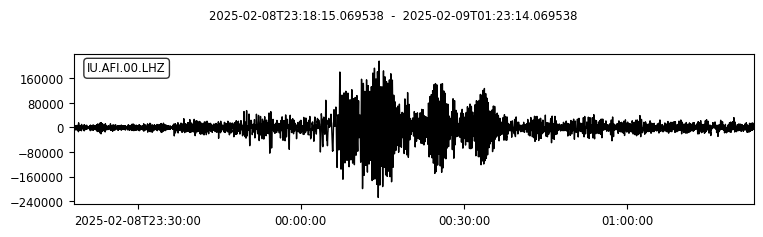

In [54]:
tr.plot();

## Removing Instrument Response

As-is, the trace data doesn't represent ground motion. The data includes instrument response which is a byproduct of how a seismometer converts the analog voltage signal of the instrument of to digital `counts`. To convert the data to actual ground velocity, we have to account for the digitizer and seismometer response to ground motion. The theory and method for removing instrument response is detailed in [Havskov and Alguacil, 2015](https://books.google.com/books?id=5PPuCgAAQBAJ&pg=PA197#v=onepage&q&f=false).

Obspy can download the trace data with the instrument response. When we remove instrument response, the data is converted to displacement, velocity, or acceleration data. We'll use the metadata from the previous trace.


1 Trace(s) in Stream:
IU.AFI.00.LHZ | 2025-02-08T23:18:15.069538Z - 2025-02-09T01:23:14.069538Z | 1.0 Hz, 7500 samples


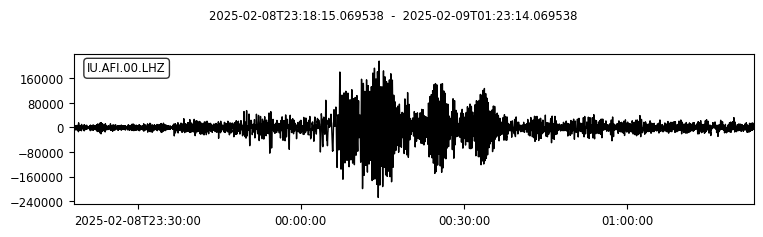

In [57]:
network = "IU"
station = "AFI"
location = "00"
channel = "LHZ"
starttime = UTCDateTime("2025-02-08T23:18:15.069538Z")
endtime = UTCDateTime("2025-02-09T01:23:14.069538Z")

st = client.get_waveforms(network, station, location, channel, starttime, endtime, attach_response = True)
print(st)
st.plot();

Removing response acts on the data itsel and changes it. For each type of output, make a copy of the trace.

In [58]:
st_velocity = st.copy()
st_displacement = st.copy()
st_acceleration = st.copy()

st_velocity.remove_response(output = 'VEL')
st_displacement.remove_response(output = 'DISP')
st_acceleration.remove_response(output = 'ACC')

1 Trace(s) in Stream:
IU.AFI.00.LHZ | 2025-02-08T23:18:15.069538Z - 2025-02-09T01:23:14.069538Z | 1.0 Hz, 7500 samples

Let's compare the original trace with the removed response.

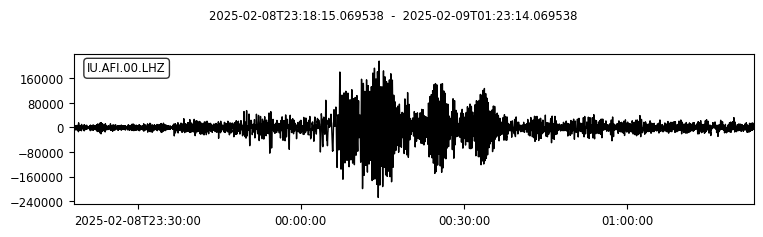

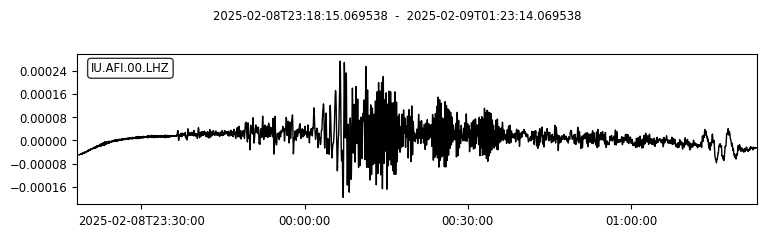

In [69]:
st.plot()
st_displacement.plot(); # units in meters

# uncomment these plots to visualize the waveforms
# st_acceleration.plot(); # units in meters/second^2
# st_velocity.plot(); # units in meters/second


Plot the 

1 Trace(s) in Stream:
IU.AFI.00.LHZ | 2025-02-08T23:18:15.069538Z - 2025-02-09T01:23:14.069538Z | 1.0 Hz, 7500 samples

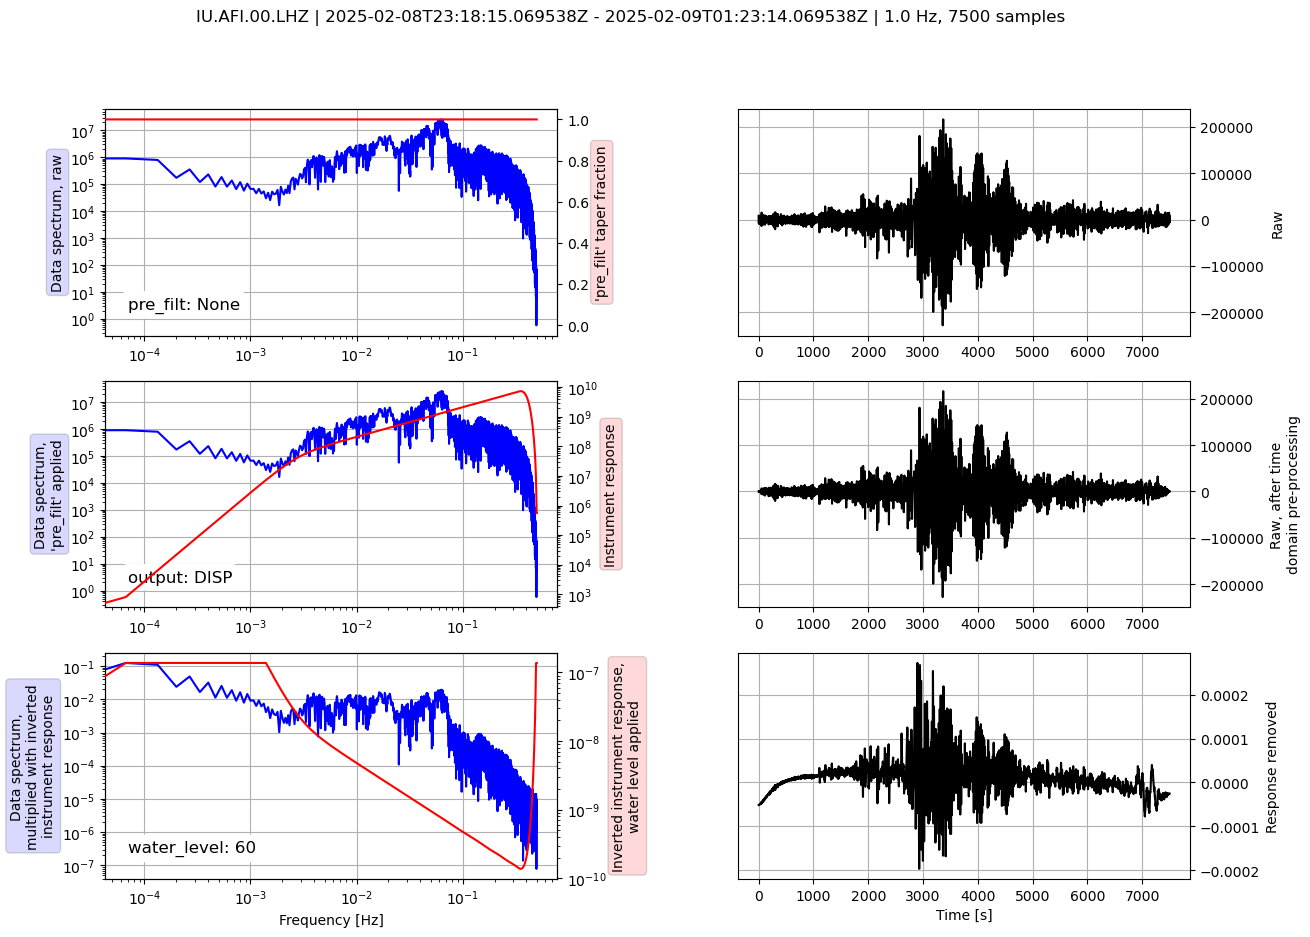

In [67]:
st_velocity = st.copy()
st_velocity.remove_response(output = 'DISP', plot = True)


## Visualizing Seismic Data

We can find earthquakes using the [`get_events` method](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html). The method can use arguments such as time, coordinates, magnitude, and many others.

> **Client.get_events**(*starttime=None*, *endtime=None*, *minlatitude=None*, *maxlatitude=None*, *minlongitude=None*, *maxlongitude=None*, *latitude=None*, *longitude=None*, *minradius=None*, *maxradius=None*, *mindepth=None*, *maxdepth=None*, *minmagnitude=None*, *maxmagnitude=None*, *magnitudetype=None*, *eventtype=None*, *includeallorigins=None*, *includeallmagnitudes=None*, *includearrivals=None*, *eventid=None*, *limit=None*, *offset=None*, *orderby=None*, *catalog=None*, *contributor=None*, *updatedafter=None*, *filename=None*, **kwargs)

This example searches for events by and magnitude. We print out the events and plot them on a map.



4 Event(s) in Catalog:
2025-03-17T22:23:37.480000Z |  +1.898,  +99.135 | 5.4  mww
2025-03-17T21:18:02.633000Z |  -5.829, +145.849 | 5.1  mb
2025-03-17T17:42:24.186000Z |  -8.997, +124.184 | 5.1  mb
2025-03-17T17:32:17.163000Z |  -2.872, +130.161 | 5.8  mww


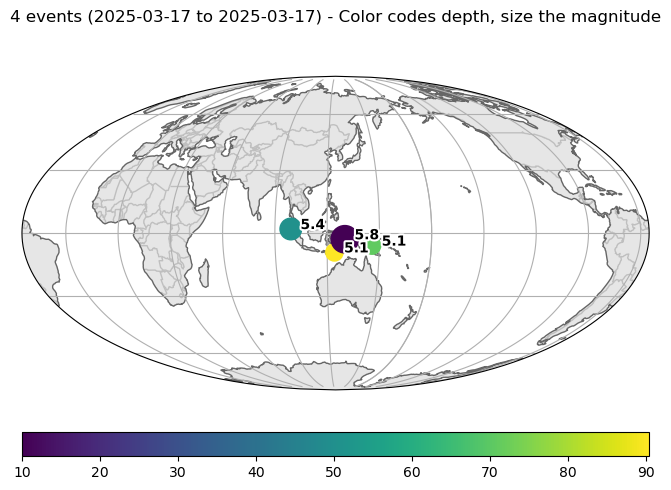

In [19]:
import warnings
import cartopy

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

client = Client("IRIS")
starttime = UTCDateTime("2025-03-17")
endtime = UTCDateTime("2025-03-18")
cat = client.get_events(starttime=starttime, endtime=endtime, minmagnitude=5, limit=4)
print(cat)
cat.plot();

The [`get_stations` method](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_stations.html) is for finding stations. 

> **Client.get_stations**(*starttime=None*, *endtime=None*, *startbefore=None*, *startafter=None*, *endbefore=None*, *endafter=None*, *network=None*, *station=None*, *location=None*, *channel=None*, *minlatitude=None*, *maxlatitude=None*, *minlongitude=None*, *maxlongitude=None*, *latitude=None*, *longitude=None*, *minradius=None*, *maxradius=None*, *level=None*, *includerestricted=None*, *includeavailability=None*, *updatedafter=None*, *matchtimeseries=None*, *filename=None*, *format=None*, **kwargs)

Let's find stations in the area of the earthquakes. The following code searches for stations using latitude and longitude within a radius of 1 degree.

What happens when you run the code below?


In [20]:
latitude = cat[0].origins[0].latitude
longitude = cat[0].origins[0].longitude

inventory = ''
try:
    inventory = client.get_stations(latitude=latitude, longitude=longitude, maxradius=5)
except Exception as e:
    print(e)
finally:
    print(inventory)

Inventory created at 2025-03-25T18:03:32.027900Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?latitude=1.8976&long...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (7):
			GE, MS, MY, PS, SY, ZB (2x)
		Stations (158):
			GE.BKNI (GEOFON Station Bangkinang, Sumatra, Indonesia)
			GE.GSI (GEOFON Station Gunungsitoli, Nias, Indonesia)
			GE.LHMI (GEOFON Station Lhokseumave, Sumatra, Indonesia)
			MS.BDTF (Bukit Timah Dairy Farm, Singapore)
			MS.BESC (Beatty Secondary School)
			MS.BTDF (Bukit Timah Dairy Farm)
			MS.KAPK (Katong Park)
			MS.NTU (Nanyang Technology University)
			MS.PTK (Pulau Tekong)
			MS.UBIN (Ubin)
			MY.FRM (FRIM Kepong)
			MY.IPM (Ipoh)
			MY.KGM (Kulang)
			MY.KOM (Kota Tinggi)
			MY.KUM (Kulim)
			PS.PSI (Parapat, Indonesia)
			SY.BKNI (BKNI synthetic)
			SY.BTDF (BTDF synthetic)
			SY.GSI (GSI synthetic)
			SY.IPM (IPM synthetic)
			SY.KOM (KOM synthetic)
			SY.KUM (KUM synt

The code uses Python's `try and except` blocks to catch errors. The `except` statement captures the error message from the service  If there are stations, the `finally` block prints stations if they are found. Try increasing `maxradius` to find stations and run the cell again. If there are stations, plot them on the map.

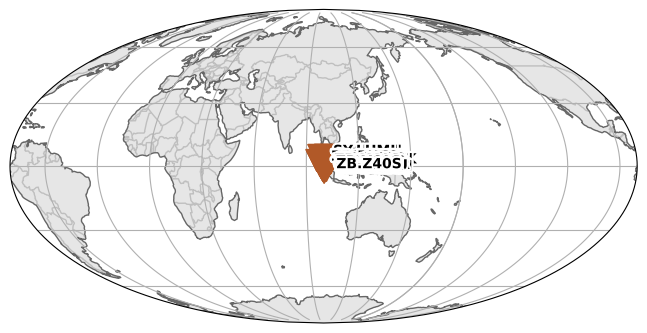

In [21]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
inventory.plot();

## Federated Routing Client (Optional)

If you want to query more than one data center, the federated routing client supports getting station and waveform data from multiple data centers. There are two federated routing web services, [IRISWS](https://service.iris.edu/irisws/fedcatalog/1/) and [EIDAWS](https://www.orfeus-eu.org/data/eida/webservices/routing/) that returns selected time series channels from across multiple FDSN or EIDA data centers. The interface is primarily designed for discovery of data channels, the subsequent requesting of time series using web service interfaces, and it is capable of removing overlap from the channel list when the same channels are available from multiple data centers, avoiding the request and processing of duplicate data.

In this section we'll use the federated routing client to find data.

In [ ]:
from obspy.clients.fdsn import RoutingClient
client = RoutingClient("iris-federator")
print(type(client))

The federated routing client can search and retrieve streams. The example below demonstrates how to retrieve streams.

In [ ]:
stream = client.get_waveforms(
    channel="LHZ", starttime=UTCDateTime(2025, 3, 17),
    endtime=UTCDateTime(2025, 3, 18), latitude=-2.872, longitude=130.161,
    maxradius=2, extended=True)  
print(stream)

We can find stations by coordinates and channel.

In [ ]:
inv = client.get_stations(
    starttime=UTCDateTime(2025, 3, 17),
    endtime=UTCDateTime(2025, 3, 18), latitude=-2.872,
    level="channel", longitude=130.161, maxradius=2)  
print(inv)
inv.plot();

We can find stations by network and station.

In [ ]:
inventory = client.get_stations(network="GE", station="B*",
                                starttime=UTCDateTime("2025-03-17"),
                                endtime=UTCDateTime("2025-03-18"),
                                level="response")
print(inventory)

In [ ]:
inventory.plot();

However, federated routing does not support finding and retrieving events. We have to use the client interface.

In [ ]:
client = Client("IRIS")
cat = client.get_events(starttime=UTCDateTime("2025-03-17"),
                        endtime=UTCDateTime("2025-03-18"), 
                        minmagnitude=4, latitude=-2.872,
                        longitude=130.161, maxradius=1)
print(cat)
cat.plot();

We don't know which station has stream data, but `get_waveforms` accepts wildcards for station and location. 

In [ ]:
t = UTCDateTime("2025-03-17T17:32:17.163000Z")
st = client.get_waveforms("GE", "*", "*", "LHZ", t - 60 * 60, t + 60 * 60)
st.plot()

# Exercise: Working with waveforms

## Download earthquake data

First: which tools do you need to import to be able to download data? If you need a reminder, check the "Downloading data from online repositories" section of the lecture notebook. If you missed it in the lecture, the full notebook has been posted to the #unit1-obspy channel on Slack. Don't forget to also set your client to IRIS.

Now you'll want to choose the time for the data you want to download, and make it into a UTCDateTime object. You can use the same time from the lecture if you want, but it would be more interesting if you chose your own earthquake! 

Go to the [USGS Earthquake Browser](https://earthquake.usgs.gov/earthquakes/map/). You can just use one of the earthquakes that shows up on the default map if you want, or you can go to the right side of the page and click the gear, which allows you to change some of your earthquake search settings. If there's a particular earthquake from years ago that you want to use, you can click "Search Earthquake Catalog" for more advanced setting changes.

Once you pick your earthquake, click its icon on the map, and then on the earthquake's header, which will show up in the bottom left corner of your screen. This will open the earthquake information page, where one of the boxes will be the "Origin" information. If you click this, you will be able to get the exact UTC date and time at which the earthquake occurred!

If you are having trouble finding any of these things to click, I included pictures in this [Imgur album](https://imgur.com/a/e5p53lY). Hopefully that helps you out!

If you got that far, your next job is to turn that UTC date and time into an actual UTCDateTIme object.

Now set your start time and end time for the segment of data you want to download

Great! You now have your two bookend times for the data you want to download. Where do we want to get it from? Remember, you need to know a network, station, location (if there is one - sometimes locations are just blank. If this happens, you can just set loc to be a wildcard), and channel or channels.

You can check out all of the available networks at IRIS MetaData Aggregator [here](http://ds.iris.edu/mda/). If you click on a network, you'll get a list of stations - and then if you click on a station, you get a list of locations and channels. 

If you're understandably overwhelmed by the sheer number of networks available, you can just start with [IU](http://ds.iris.edu/mda/IU/), which is the Global Seismic Network. There are stations all over the world, so you can just pick whichever is closest to the earthquake you chose, since the IU network page includes a link to a [map](http://ds.iris.edu/gmap/#network=IU&starttime=1988-01-01T00:00:00&endtime=2599-12-31T23:59:59&planet=earth) of all of the stations!

Again, if you're having trouble figuring out what you're looking at on the IRIS MDA, check out this [Imgur album](https://imgur.com/a/YBxrAvT) with some screenshots!

Now use get_waveforms to download the data (make sure you attach the instrument response!), check out the metadata, and make a simple plot with the stream method we used many times in the lecture.

If you get an error “FDSNNoDataException: No data available for request. Detailed response of server:”, you either typed something wrong, the earthquake was so recent that data isn’t available yet, or the instrument wasn’t working. You can try to pick a different location or station, or a different earthquake. Experiment!

## Remove instrument response

Use the stream method remove_response to convert your earthquake data from digital counts to velocity, acceleration, or displacement (your choice!). Visit this section of the lecture notebook if you don't remember how, and remember to copy your original data stream first if you want to keep it and be able to plot them side by side to compare them!

## Stream and Trace 

We worked with a few different public methods for stream and trace objects in the lecture. Try some of them out, changing options if you can! In lecture we filtered our data (try a different kind!), trimmed it, and changed the sampling rate (try a different method!), so you can go back to your notebook or the full one provided in Slack for a reminder of how to do these things if needed. 

In addition to practicing implementing these methods, pick another one from the lists in the documentation either for [traces](https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.html#obspy.core.trace.Trace) or [streams](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html) and see if you can get it working. 

Don't forget to copy your data stream before you implement any of these methods!

### Filtering

### Trimming data

## Change sampling rates

## Plotting

The last thing I'd like you to practice implementing in this lab is to make some nicer plots of your seismic data using Matplotlib. As I mentioned in lecture, you can spend hours messing with plots to make them better, so this can be a very freeform section! Don't forget you'll need to import matplotlib.pyplot, as well as matplotlib.mdates if you want to put UTC times on your x-axis.

Like we did in lecture, start by separating out the times and data into their Numpy arrays so you can plot them. Then use the lecture notebook (or full notebook on Slack) to plot the data and add whatever features you want. You can check out the [Matplotlib website](https://matplotlib.org/) if you want to make it more complicated than we did in lecture!